In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline

In [2]:
data=pd.read_csv('mental-health-in-tech-survey.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
data.drop(['state','comments','Timestamp'],axis=1,inplace=True)

In [8]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [9]:
data.work_interfere=data.work_interfere.fillna('Unknown')
data.self_employed=data.self_employed.fillna('Unknown')

In [10]:
data.isnull().any()

Age                          False
Gender                       False
Country                      False
self_employed                False
family_history               False
treatment                    False
work_interfere               False
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
dtype: bool

In [11]:
data.duplicated().sum()

4

In [12]:
data=data.drop_duplicates()

In [13]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Unknown,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,Unknown,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Unknown,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Unknown,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Unknown,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,Unknown,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,Unknown,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [14]:
print(data['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [15]:
data['Age'] = data['Age'].apply(lambda x: np.nan if x < 18 or x > 65 else x)
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)
data['Age']=data['Age'].astype(int)

C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\3340449090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].apply(lambda x: np.nan if x < 18 or x > 65 else x)
C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\3340449090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(median_age, inplace=True)
C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\3340449090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [16]:
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Unknown,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,Unknown,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Unknown,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Unknown,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Unknown,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,Unknown,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,Unknown,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


### Handling categorical columns

In [17]:
columns=data.columns
for column in columns:
    print(f'Column:{column}')
    print(data[column].unique())
    print('----------')

Column:Age
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61]
----------
Column:Gender
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
----------
Column:Country
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden

In [18]:
for column in columns:
    if column=='Age':
        continue
    data[column]=data[column].str.strip()
# for col in data.select_dtypes(include='object').columns:
#     data[col] = data[col].astype(str).str.strip()


C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\2554602744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]=data[column].str.strip()


In [19]:
def clean_gender(g):
    g = str(g).strip().lower() 

    male_list = ['male','m','man','male-ish','maile','mal','male (cis)','cis male',
        'male leaning androgynous','make','msle','mail','malr','cis man',
        'guy (-ish) ^_^']
    
    female_list = ['female','f','woman','femake','female ','cis female',
        'cis-female/femme','female (cis)','female (trans)','trans-female',
        'trans woman','femail']

    if g in male_list:
        return 'Male'
    if g in female_list:
        return 'Female'
    
    return 'Other'
data['Gender'] = data['Gender'].apply(clean_gender)

C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\3158203957.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].apply(clean_gender)


In [20]:
data.Gender.value_counts()

Male      989
Female    251
Other      15
Name: Gender, dtype: int64

In [21]:
country_count=data.Country.value_counts()

In [22]:
countries=country_count[country_count>=20].index

In [23]:
countries

Index(['United States', 'United Kingdom', 'Canada', 'Germany', 'Ireland',
       'Netherlands', 'Australia'],
      dtype='object')

In [24]:
data['Country'] = data['Country'].apply(lambda x: x if x in countries else 'Other')

C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\1084474751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = data['Country'].apply(lambda x: x if x in countries else 'Other')


In [25]:
data.Country.value_counts()

United States     751
United Kingdom    184
Other             129
Canada             72
Germany            45
Ireland            27
Netherlands        26
Australia          21
Name: Country, dtype: int64

In [26]:
replace_unknown = {"Don't know": "Unknown","Not sure": "Unknown"}
cols_to_clean = ['benefits', 'care_options', 'wellness_program', 'seek_help','anonymity', 'mental_vs_physical','leave']

for col in cols_to_clean:
    data[col] = data[col].replace(replace_unknown)


C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\2749155342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].replace(replace_unknown)


In [27]:
columns=data.columns
for column in columns:
    print(f'Column:{column}')
    print(data[column].unique())
    print('----------')

Column:Age
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61]
----------
Column:Gender
['Female' 'Male' 'Other']
----------
Column:Country
['United States' 'Canada' 'United Kingdom' 'Other' 'Netherlands'
 'Australia' 'Germany' 'Ireland']
----------
Column:self_employed
['Unknown' 'Yes' 'No']
----------
Column:family_history
['No' 'Yes']
----------
Column:treatment
['Yes' 'No']
----------
Column:work_interfere
['Often' 'Rarely' 'Never' 'Sometimes' 'Unknown']
----------
Column:no_employees
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
----------
Column:remote_work
['No' 'Yes']
----------
Column:tech_company
['Yes' 'No']
----------
Column:benefits
['Yes' 'Unknown' 'No']
----------
Column:care_options
['Unknown' 'No' 'Yes']
----------
Column:wellness_program
['No' 'Unknown' 'Yes']
----------
Column:seek_help
['Yes' 'Unknown' 'No']
----------
Column:anonymity
['Yes' 'Unknown' 'No']
----------

# _________________________________________________________________________________ 

C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\181644288.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='treatment',palette='viridis')


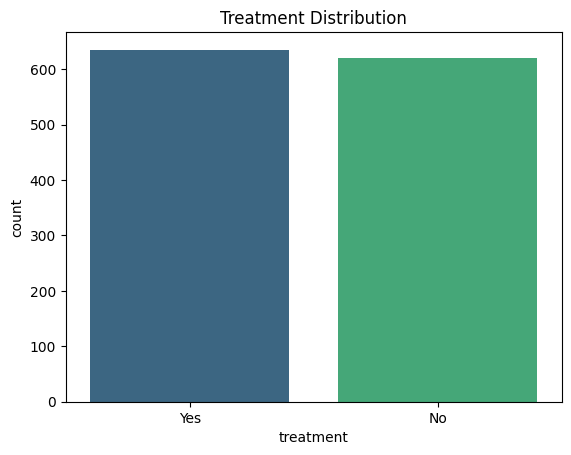

In [28]:
sns.countplot(data=data, x='treatment',palette='viridis')
plt.title("Treatment Distribution")
plt.show()


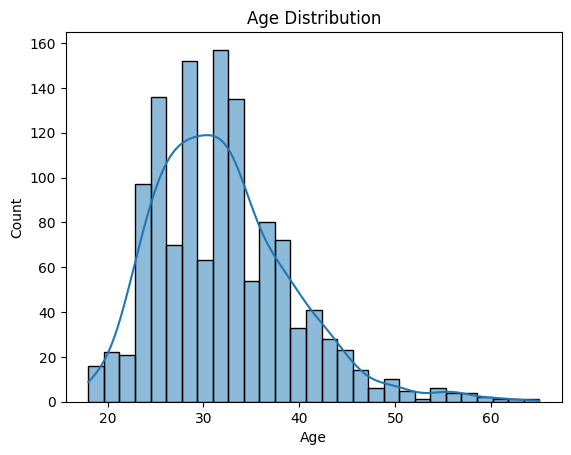

In [29]:
sns.histplot(data=data,x='Age',kde=True)
plt.title("Age Distribution")
plt.show()


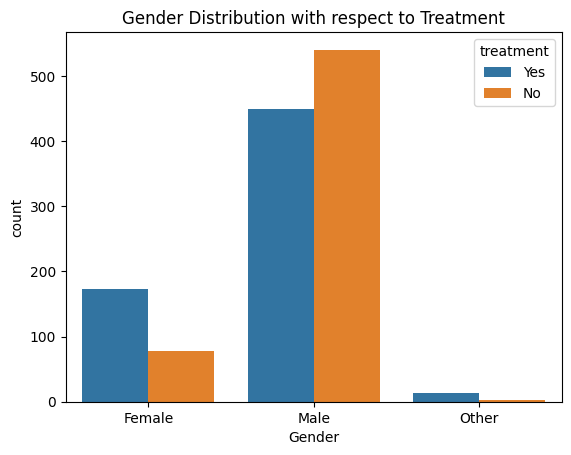

In [30]:
sns.countplot(data=data, x='Gender', hue='treatment')
plt.title("Gender Distribution with respect to Treatment")
plt.show()


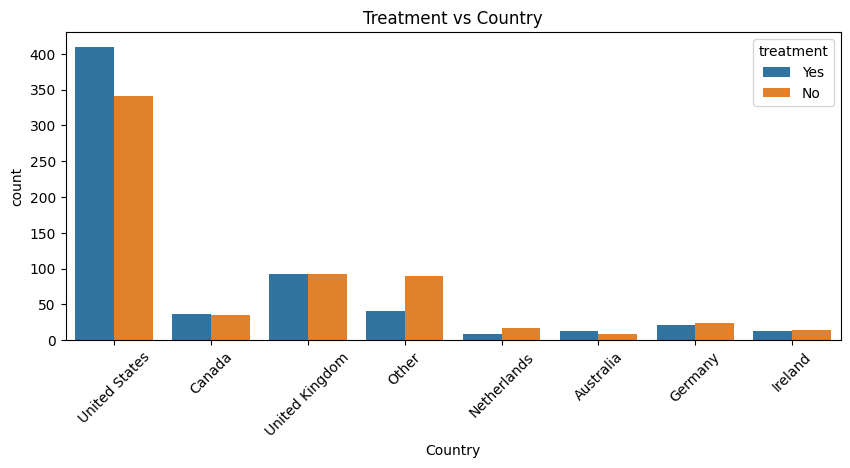

In [31]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Country', hue='treatment')
plt.xticks(rotation=45)
plt.title("Treatment vs Country")
plt.show()


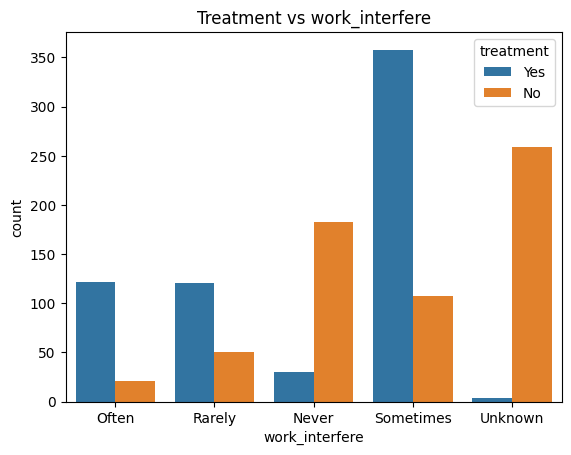

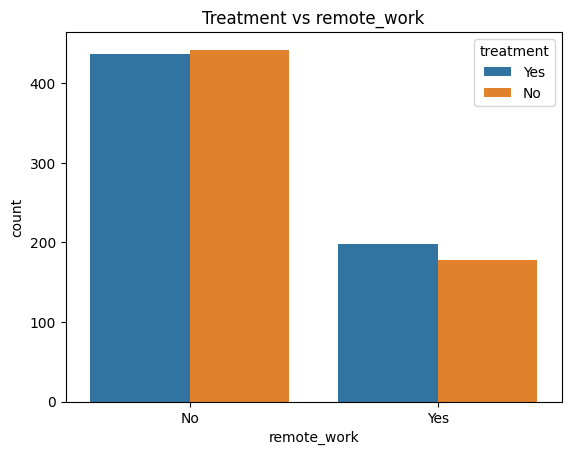

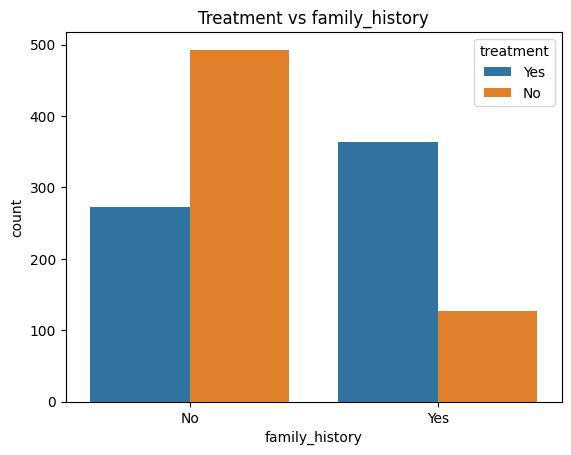

In [32]:
list=['work_interfere','remote_work','family_history']
for l in list:
    sns.countplot(data=data, x=l, hue='treatment')
    plt.title(f"Treatment vs {l}")
    plt.show()

# ____________________________________________________________________________________

In [33]:
data['treatment'] = data['treatment'].map({'No': 0, 'Yes': 1})

C:\Users\rampr\AppData\Local\Temp\ipykernel_31360\2091537099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['treatment'] = data['treatment'].map({'No': 0, 'Yes': 1})


In [34]:
data.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [35]:
selected_columns=['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work','benefits', 
                  'care_options', 'wellness_program','anonymity', 'leave', 'coworkers', 'supervisor']

In [36]:
X=data[selected_columns]
Y=data.treatment

In [37]:
data['treatment'].value_counts()

1    635
0    620
Name: treatment, dtype: int64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42,stratify=Y)

In [39]:
# Identify feature types
numeric_features = ['Age']
categorical_features = x_train.columns.drop('Age').tolist()

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale only Age
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode all categorical columns
    ]
)

In [45]:
pipelines = {
    "Logistic Regression": Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(max_iter=2000))
    ]),

    "Random Forest": Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier())
    ]),

    "Gradient Boosting": Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', GradientBoostingClassifier())
    ]),

    "XG Boost" : Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}


In [46]:
def evaluate_model(name, model, x_test, y_test):
    print(f"\n===== {name} =====")
    
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    if y_prob is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


===== Logistic Regression =====
Accuracy: 0.8446215139442231
Precision: 0.8188405797101449
Recall: 0.889763779527559
F1 Score: 0.8528301886792453
ROC-AUC: 0.9003048006096012

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       124
           1       0.82      0.89      0.85       127

    accuracy                           0.84       251
   macro avg       0.85      0.84      0.84       251
weighted avg       0.85      0.84      0.84       251



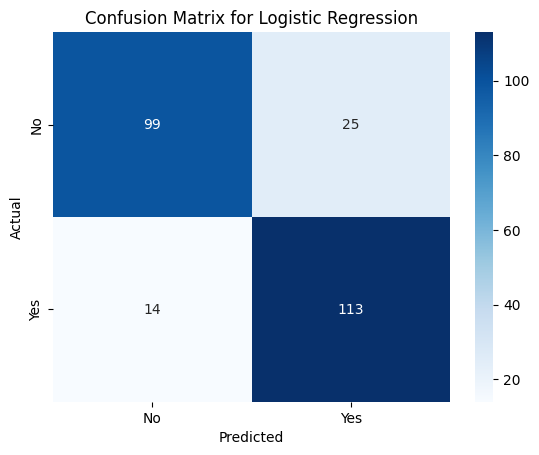


===== Random Forest =====
Accuracy: 0.8247011952191236
Precision: 0.7985611510791367
Recall: 0.8740157480314961
F1 Score: 0.8345864661654135
ROC-AUC: 0.9025590551181102

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       124
           1       0.80      0.87      0.83       127

    accuracy                           0.82       251
   macro avg       0.83      0.82      0.82       251
weighted avg       0.83      0.82      0.82       251



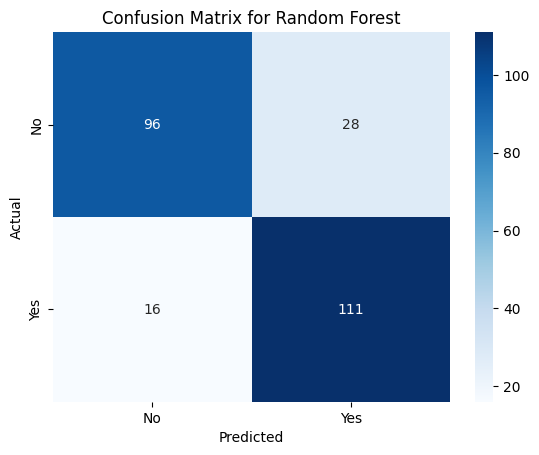


===== Gradient Boosting =====
Accuracy: 0.8286852589641435
Precision: 0.8
Recall: 0.8818897637795275
F1 Score: 0.8389513108614233
ROC-AUC: 0.8961772923545848

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       124
           1       0.80      0.88      0.84       127

    accuracy                           0.83       251
   macro avg       0.83      0.83      0.83       251
weighted avg       0.83      0.83      0.83       251



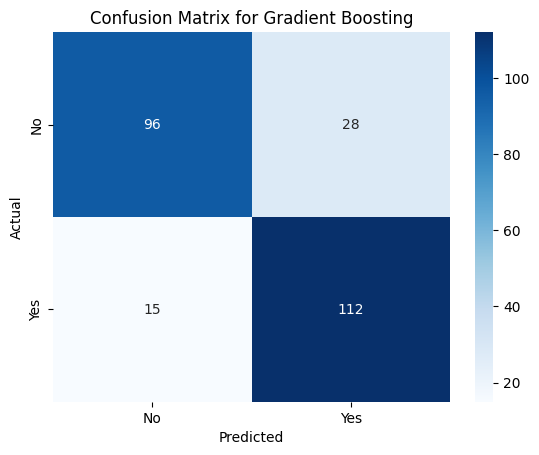

C:\Users\rampr\anaconda3\envs\profiling\lib\site-packages\xgboost\training.py:183: UserWarning: [13:52:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XG Boost =====
Accuracy: 0.8007968127490039
Precision: 0.7894736842105263
Recall: 0.8267716535433071
F1 Score: 0.8076923076923077
ROC-AUC: 0.8820802641605282

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       124
           1       0.79      0.83      0.81       127

    accuracy                           0.80       251
   macro avg       0.80      0.80      0.80       251
weighted avg       0.80      0.80      0.80       251



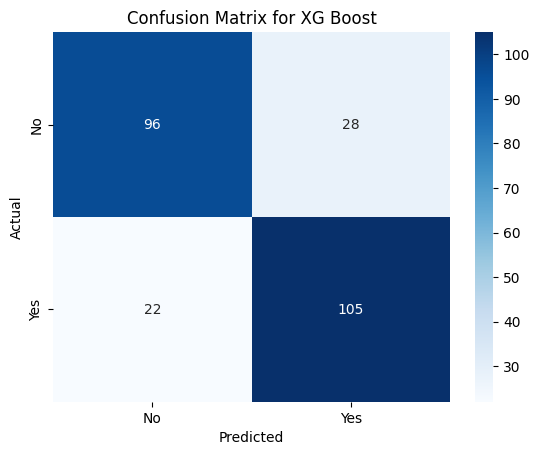

In [47]:
results = {}
for name, pipe in pipelines.items():
    pipe.fit(x_train, y_train)
    evaluate_model(name, pipe, x_test, y_test)
    results[name] = pipe

In [48]:
data.to_csv("cleaned_mental_health_dataset.csv", index=False)